In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data = pd.read_csv("Sigmoide_Du_Cul_m.txt", sep=";")

data.head()

,mean,stdev,acceptation,E(fitness),sigma(fitness),Generation,fitness1,"Genes(Scores(0,1),:)",fitness50,"Genes(Scores(49,1),:)",fitness100,"Genes(Scores(99,1),:)",Unnamed: 12
0,-10,10,0.9,7.288900e-21,4.292120e-20,0,3.288560e-19,"[-10.2768, -12.9361, 12.1583, -0.509961, -10....",4.355910e-24,"[ -6.36978, -14.7264, 7.7348, -1.0344, -6.3310...",[ 0,"-21.3046, 0.475066, 3.41778, -10.0916, -6.621...",NaN
1,-10,10,0.9,4.348970e-20,3.651400e-19,1,3.651690e-18,"[-6.02446, 9.1435, -13.0644, -4.42365, -27.42...",1.510910e-23,"[ -13.1703, -3.40956, -13.9395, -25.1223, -15....",[ 0,"-23.3806, 5.78565, -21.4564, -15.272, 2.60833...",NaN
2,-10,10,0.9,3.736190e-20,3.632870e-19,2,3.651690e-18,"[-6.02446, 9.1435, -13.0644, -4.42365, -27.42...",2.959170e-24,"[ -10.2768, 0.475066, 12.1583, 7.08068, -6.621...",[ 0,"-10.3412, -7.05886, -5.41264, -4.96229, -11.5...",NaN
3,-10,10,0.9,3.737650e-20,3.632860e-19,3,3.651690e-18,"[-6.02446, 9.1435, -13.0644, -4.42365, -27.42...",1.996760e-23,"[ -1.07231, -19.2283, -2.57876, -16.9124, 7.32...",[ 0,"-14.1252, -8.86669, -7.80335, -5.07135, -5.02...",NaN
4,-10,10,0.9,3.878610e-20,3.632980e-19,4,3.651690e-18,"[-6.02446, 9.1435, -13.0644, -4.42365, -27.42...",3.183060e-23,"[ -1.07231, -8.86669, -0.880808, -4.92719, -19...",[ 0,"-4.55085, -17.987, -12.8075, 5.27358, -11.209...",NaN


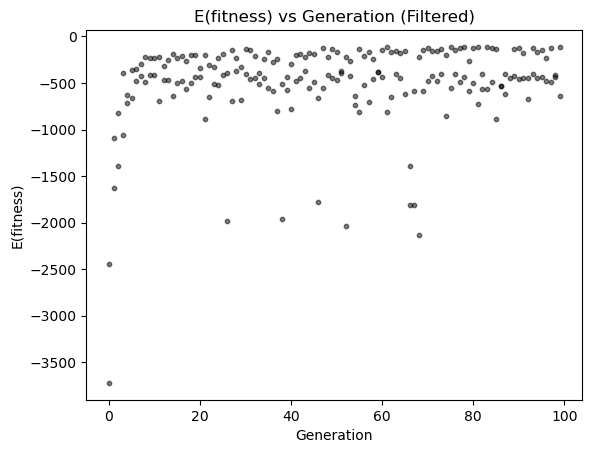

In [42]:
treshold = -4000
dataf = data[(data["E(fitness)"] >= treshold)]

plt.scatter(dataf["Generation"], dataf["E(fitness)"], c="k", alpha=0.5, s=10)
plt.xlabel("Generation")
plt.ylabel("E(fitness)")
plt.title("E(fitness) vs Generation (Filtered)")
plt.show()

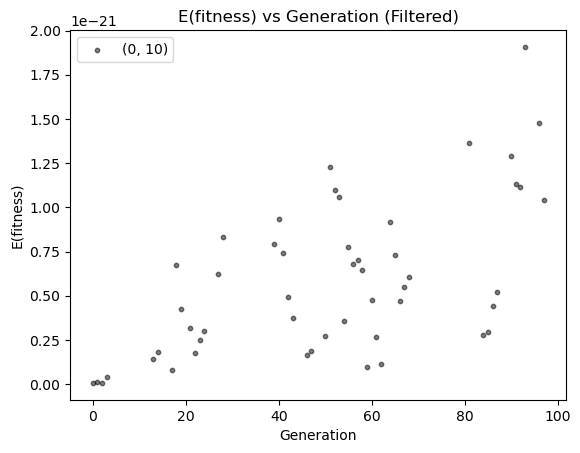

In [25]:
Values = [(0, 10, 2e-21, "k")]

for i in range(len(Values)):
    mean = Values[i][0]
    stdev = Values[i][1]
    treshold = Values[i][2]
    color = Values[i][3]
    dataf = data[((data["E(fitness)"] <= treshold) & (data["mean"] == mean) & (data["stdev"] == stdev))]

    plt.scatter(dataf["Generation"], dataf["E(fitness)"], c=color, alpha=0.5, s=10, label=f'({mean}, {stdev})')
plt.xlabel("Generation")
plt.ylabel("E(fitness)")
plt.title("E(fitness) vs Generation (Filtered)")
plt.legend()
plt.show()

In [147]:
def Visualiser_data(mean, stdev, acceptation, Name):
    A = np.array([])
    B = [str(mean), str(stdev), str(acceptation)]

    df = data[((data["mean"] == mean) & (data["stdev"] == stdev) & data["acceptation"] == acceptation)]

    mask = (df["Generation"] == 0)

    A = np.array([df[mask]["E(fitness)"], df[mask]["fitness1"], df[mask]["Genes(Scores(0,1),:)"]])
    B.append(str(A[0][0]))
    B.append(str(A[1][0]))
    B.append(A[2,0][2:-2].replace(",",""))


    mask = (df["fitness1"] == df["fitness1"].max())

    A = np.array([df[mask]["E(fitness)"], df[mask]["fitness1"], df[mask]["Genes(Scores(0,1),:)"]])
    B.append(str(A[0][0]))
    B.append(str(A[1][0]))
    B.append(A[2,0][2:-2].replace(",",""))

    mask = (df["Generation"] == df["Generation"].max())

    A = np.array([df[mask]["E(fitness)"], df[mask]["fitness1"], df[mask]["Genes(Scores(0,1),:)"]])
    B.append(str(A[0][0]))
    B.append(str(A[1][0]))
    B.append(A[2,0][2:-2].replace(",",""))

    with open(Name, "w") as file:
        # Write each string to the file
        for string in B:
            file.write(string + "\n")

In [148]:
mean = 0
stdev = 10
acceptation = 1
Name = "test.txt"
Visualiser_data(mean, stdev, acceptation, Name)